In [1]:
import torch
import sys
import pyro

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

import numpy as np

from pooledQTL import deconvolve, beta_model, gaussian_model, io_utils, asb_data

from importlib import reload

from pathlib import Path

fdr_threshold = 0.05
device = "cuda:0" if torch.cuda.is_available() else "cpu"
use_structured_guide = True # performs much better

results_dir = Path("/gpfs/commons/home/daknowles/pooledRBPs/results/HNRNPK")

/gpfs/commons/home/daknowles/.conda/envs/asb/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 Load input RNA allelic counts. We should know have good depth for both biological replicates. 

In [21]:
reps = ["rep1", "rep2"]

merged = { 
    rep:pd.read_csv(
    results_dir / ("merged_%s.tsv.gz" % rep), 
    index_col = False, 
    sep = "\t" )
    for rep in reps }

dat_sub = { 
    rep:pd.read_csv(
    results_dir / ("filtered_%s.tsv.gz" % rep), 
    index_col = False, 
    sep = "\t" )
    for rep in reps }

# Non-gaussian models without replicates

Could also run this with the mean field guide. 

rep1
/gpfs/commons/home/daknowles/pooledRBPs/results/HNRNPK/Laplace_struct_rep1.tsv.gz
Learned hyperparameters: {'ase_scale': 0.22400707006454468, 'input_count_conc': 480.93890380859375, 'asb_scale': 0.2115667760372162, 'IP_count_conc': 427.7677307128906}
{'ase_scale': 0.22400707006454468, 'input_count_conc': 480.93890380859375, 'asb_scale': 0.2115667760372162, 'IP_count_conc': 427.7677307128906}


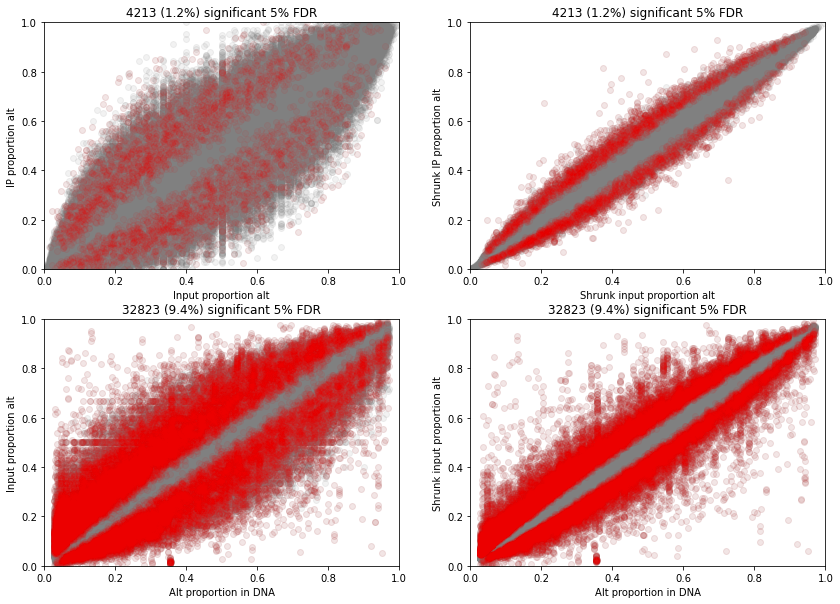

/gpfs/commons/home/daknowles/pooledRBPs/results/HNRNPK/Laplace_struct_rep1.tsv.gz
Learned hyperparameters: {'ase_scale': 0.29519495368003845, 'input_count_conc': 245.92446899414062, 'asb_scale': 0.2636982202529907, 'IP_count_conc': 284.1300964355469}
{'ase_scale': 0.29519495368003845, 'input_count_conc': 245.92446899414062, 'asb_scale': 0.2636982202529907, 'IP_count_conc': 284.1300964355469}


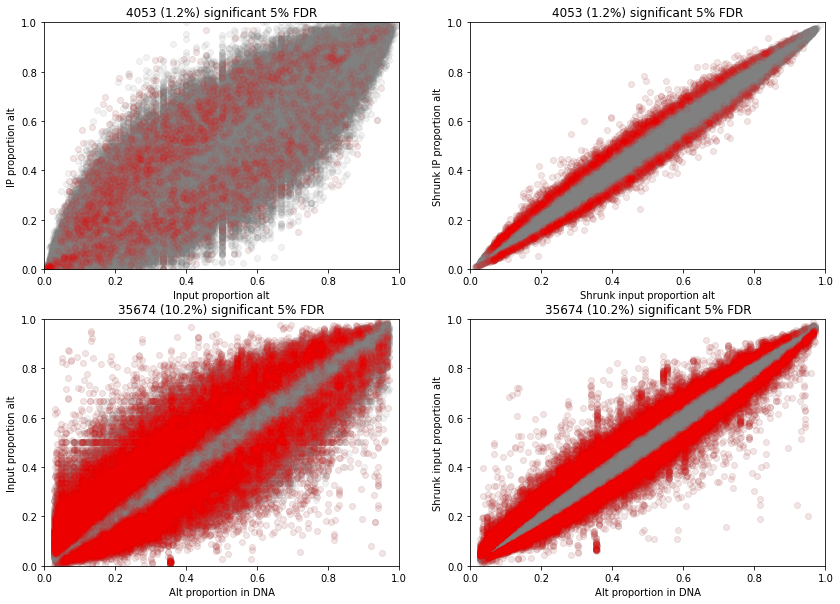

/gpfs/commons/home/daknowles/pooledRBPs/results/HNRNPK/Laplace_struct_rep1.tsv.gz
Learned hyperparameters: {'ase_scale': 0.2248990684747696, 'input_count_conc': 380.7276611328125, 'asb_scale': 0.2462540566921234, 'IP_count_conc': 357.2630310058594, 'ase_t_df': 4.508730411529541, 'asb_t_df': 33.06991195678711}
{'ase_scale': 0.2248990684747696, 'input_count_conc': 380.7276611328125, 'asb_scale': 0.2462540566921234, 'IP_count_conc': 357.2630310058594, 'ase_t_df': 4.508730411529541, 'asb_t_df': 33.06991195678711}


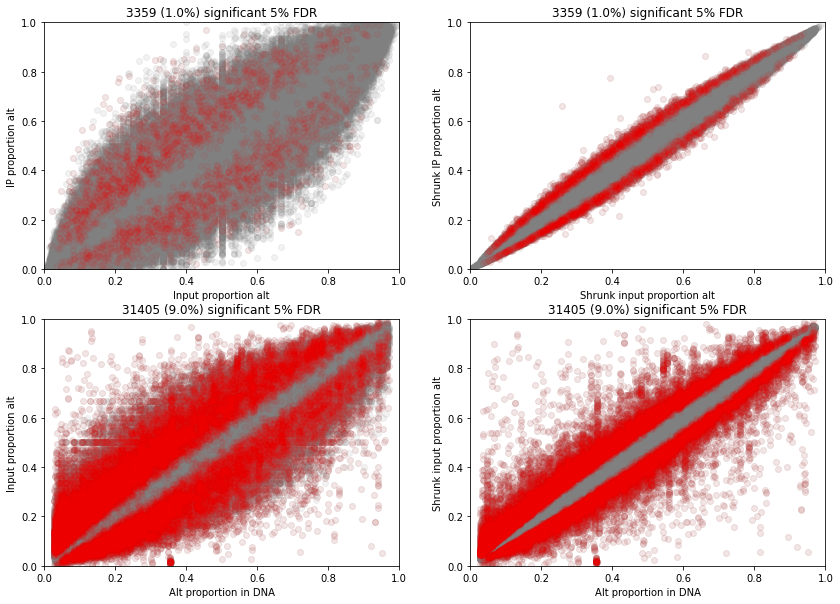

/gpfs/commons/home/daknowles/pooledRBPs/results/HNRNPK/Laplace_struct_rep1.tsv.gz
Learned hyperparameters: {'ase_scale': 0.20199571549892426, 'input_count_conc': 419.2533874511719, 'asb_scale': 0.20211844146251678, 'IP_count_conc': 441.0393981933594}
{'ase_scale': 0.20199571549892426, 'input_count_conc': 419.2533874511719, 'asb_scale': 0.20211844146251678, 'IP_count_conc': 441.0393981933594}


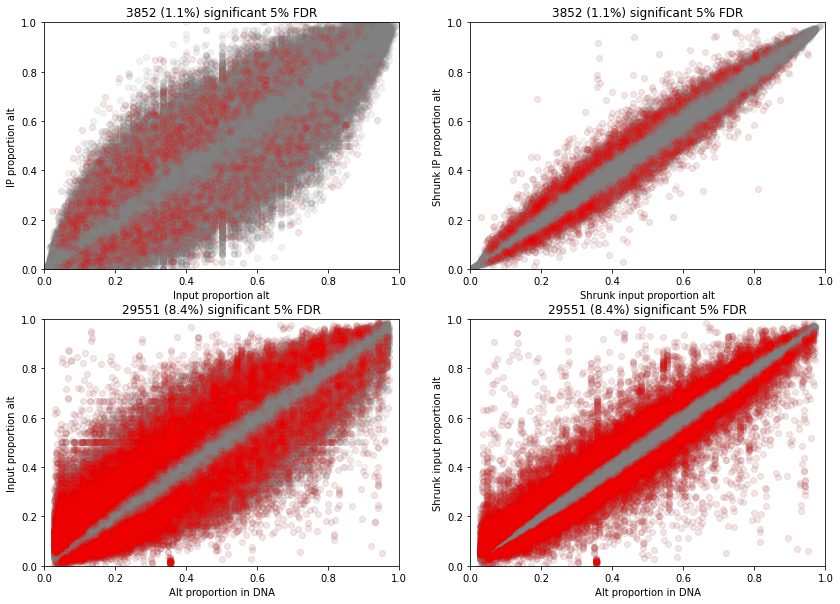

rep2
/gpfs/commons/home/daknowles/pooledRBPs/results/HNRNPK/Laplace_struct_rep1.tsv.gz
Learned hyperparameters: {'ase_scale': 0.2305634468793869, 'input_count_conc': 418.4076232910156, 'asb_scale': 0.22826553881168365, 'IP_count_conc': 410.1758117675781}
{'ase_scale': 0.2305634468793869, 'input_count_conc': 418.4076232910156, 'asb_scale': 0.22826553881168365, 'IP_count_conc': 410.1758117675781}


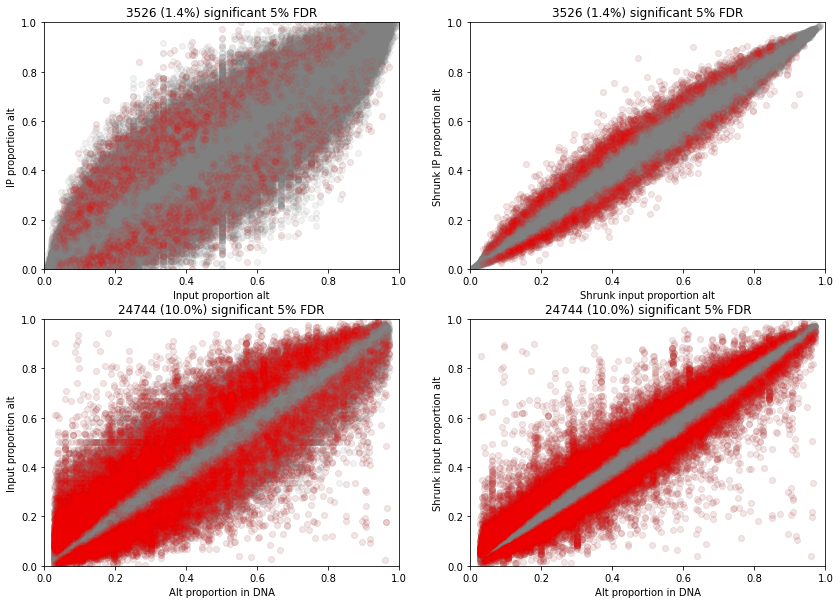

/gpfs/commons/home/daknowles/pooledRBPs/results/HNRNPK/Laplace_struct_rep1.tsv.gz
Learned hyperparameters: {'ase_scale': 0.3037208020687103, 'input_count_conc': 216.21856689453125, 'asb_scale': 0.28166383504867554, 'IP_count_conc': 262.888916015625}
{'ase_scale': 0.3037208020687103, 'input_count_conc': 216.21856689453125, 'asb_scale': 0.28166383504867554, 'IP_count_conc': 262.888916015625}


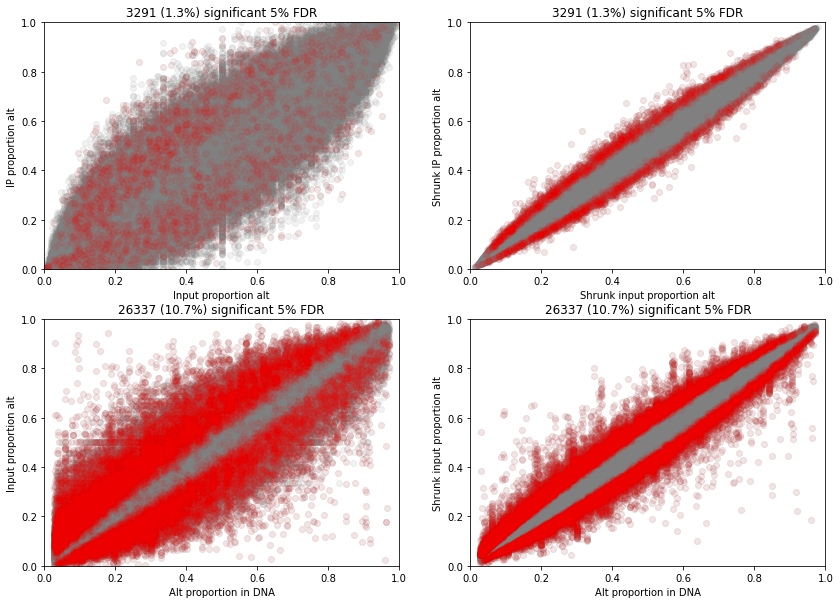

/gpfs/commons/home/daknowles/pooledRBPs/results/HNRNPK/Laplace_struct_rep1.tsv.gz
Learned hyperparameters: {'ase_scale': 0.22940945625305176, 'input_count_conc': 325.60919189453125, 'asb_scale': 0.2650876045227051, 'IP_count_conc': 323.85992431640625, 'ase_t_df': 4.3694844245910645, 'asb_t_df': 34.52012634277344}
{'ase_scale': 0.22940945625305176, 'input_count_conc': 325.60919189453125, 'asb_scale': 0.2650876045227051, 'IP_count_conc': 323.85992431640625, 'ase_t_df': 4.3694844245910645, 'asb_t_df': 34.52012634277344}


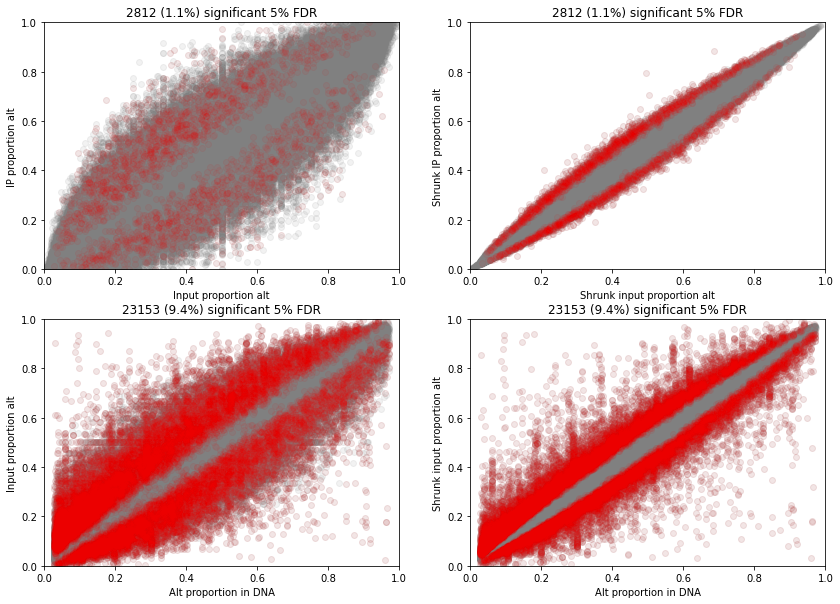

/gpfs/commons/home/daknowles/pooledRBPs/results/HNRNPK/Laplace_struct_rep1.tsv.gz
Learned hyperparameters: {'ase_scale': 0.20699991285800934, 'input_count_conc': 363.8375549316406, 'asb_scale': 0.21806380152702332, 'IP_count_conc': 418.37786865234375}
{'ase_scale': 0.20699991285800934, 'input_count_conc': 363.8375549316406, 'asb_scale': 0.21806380152702332, 'IP_count_conc': 418.37786865234375}


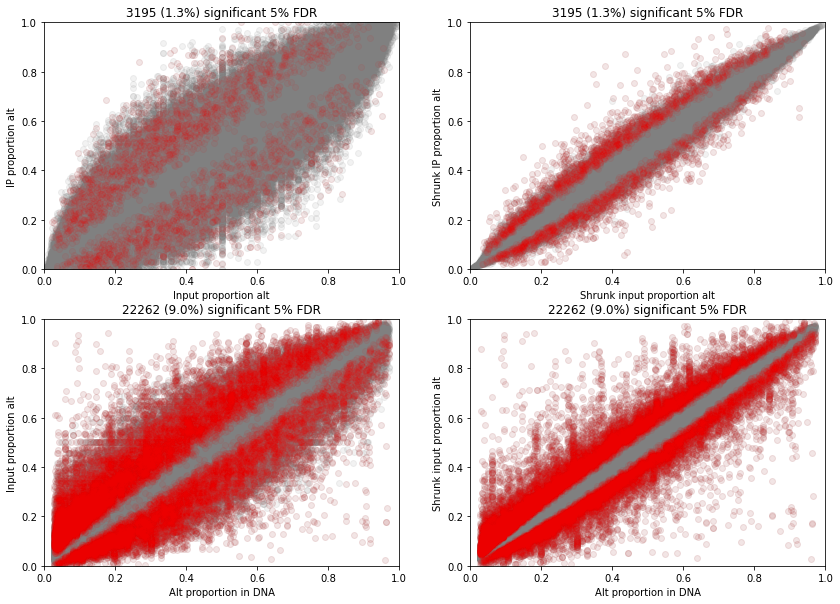

In [22]:
reload(beta_model)
reload(gaussian_model)

for rep in reps:
    print(rep)
    for (studentT, learn_t_dof, Laplace) in [
        (False, False, True), 
        (False, False, False), 
        (True, True, False),
        (True, False, False)]:
        outfilestub = results_dir / (
            ("studentT" if studentT else ("Laplace" if Laplace else "normal"))
            + ("_learnDOF" if learn_t_dof else "")
            + ("_struct" if use_structured_guide else "") 
            + ("_%s" % rep))
        print(outfile)
        #if not outfile.is_file():
        if True:
            results, hypers = gaussian_model.fit_and_save(
                dat_sub[rep], 
                outfilestub, 
                use_structured_guide = use_structured_guide,
                studentT = studentT, 
                Laplace = Laplace,
                learn_t_dof = learn_t_dof, 
                iterations = 1000,
                device = device)
            print(hypers)
            beta_model.make_plots(results, fdr_threshold = fdr_threshold)
